In [90]:
import numpy as np
import pandas as pd


credit_data = pd.read_csv(r'C:\Users\Suvir Gupta\PycharmProjects\Projects\word2vec\nueral net\data\Credit_Card_Applications.csv')
credit_data_train = credit_data.iloc[:,:-1].values
y = credit_data.iloc[:,-1].values


from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler(feature_range = (0,1))

In [91]:
x = scale.fit_transform(credit_data_train)

In [77]:
from minisom import MiniSom
som = MiniSom(x= 10 , y=10, input_len = 15, sigma = 1.0,learning_rate = 0.5)
som.random_weights_init(x)
som.train_random(data = x, num_iteration= 100)

##### visualization of the trained model 



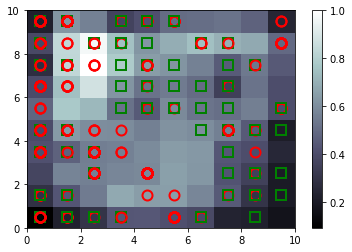

In [78]:
from pylab import bone,pcolor,show,colorbar,plot
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, j in enumerate(x):
    w = som.winner(j)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)

show()

In [79]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

In [80]:
pc = PCA(n_components= 2)

In [81]:
x_comp = pc.fit_transform(x[:,1:])

In [82]:
x_comp

array([[-0.61119289, -0.67645311],
       [-0.68233999,  0.61975056],
       [-0.62471672, -0.28989359],
       ..., 
       [-0.01308906,  0.61268552],
       [ 0.83507732,  0.78684343],
       [-0.06967512,  0.37785755]])

In [83]:
cluster = KMeans(n_clusters = 16)
cluster = cluster.fit(x_comp[:,1:])

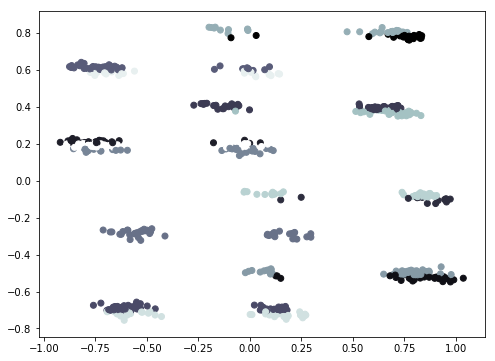

In [84]:
# And we'll visualize it:
plt.figure(figsize=(8, 6))
plt.scatter(x_comp[:,0],x_comp[:,1], c=cluster.labels_.astype(float))
plt.show()

In [72]:
cluster.labels_.astype(float)

array([ 11.,   6.,   7.,   8.,   0.,   9.,  10.,   9.,   3.,   5.,   1.,
         1.,   1.,   1.,   4.,  10.,  12.,   2.,  10.,   2.,   6.,   7.,
        10.,   3.,  10.,   1.,   3.,   1.,   2.,  12.,   1.,   7.,  14.,
         1.,  12.,   0.,   4.,  12.,   8.,   5.,  10.,   4.,   3.,  12.,
         0.,   8.,   6.,  10.,  15.,   2.,  11.,   3.,   3.,   4.,   1.,
        12.,  13.,  15.,   4.,  12.,   4.,   8.,   0.,  15.,  15.,  13.,
         7.,  11.,   0.,   1.,  11.,   9.,  10.,   1.,  13.,  10.,  14.,
        10.,   0.,   2.,   0.,   2.,   6.,   3.,   4.,  10.,  15.,   5.,
        11.,  10.,  14.,  10.,  10.,   0.,  15.,  10.,   6.,  10.,   8.,
         2.,   6.,   4.,   4.,  13.,   0.,   7.,  13.,  10.,   7.,  11.,
        10.,  11.,   1.,   2.,  14.,   1.,   5.,  12.,  12.,  13.,   0.,
         4.,   6.,   2.,   5.,   0.,   2.,  10.,   6.,  12.,   8.,   6.,
        10.,  15.,  10.,   6.,   0.,   0.,  12.,   5.,  14.,   6.,  11.,
         1.,   2.,   9.,   1.,   6.,  14.,   9.,  1

In [93]:
# Finding the frauds
mappings = som.win_map(x)
frauds = np.concatenate((mappings[(3,7)], mappings[(8,4)]), axis = 0)
frauds = scale.inverse_transform(frauds)

# Part 2 - Going from Unsupervised to Supervised Deep Learning
# Creating the matrix of features
customers = credit_data.iloc[:, 1:].values

# Creating the dependent variable
is_fraud = np.zeros(len(credit_data))
for i in range(len(credit_data)):
    if credit_data.iloc[i,0] in frauds:
        is_fraud[i] = 1

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

output fraud detected can be used for the input inde[endent variable for neural analysis 